# Digit recognition using MNIST digits dataset

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import digits dataset
digits_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

In [3]:
# Class names storing point
class_names = ['0','1', '2', '3', '4', '5', 
               '6', '7', '8', '9']

In [4]:
# Inspecting image
def inspect_plt(data_image,number):
    plt.figure()
    plt.imshow(data_image[number])
    plt.colorbar()
    plt.grid(False)

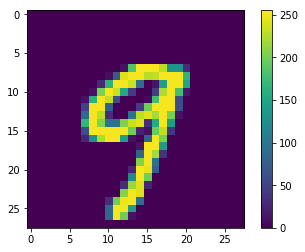

In [5]:
# Inspect n-th image
n=45
inspect_plt(train_images,n)

In [6]:
# Remember to preprocess training and testing set in the same ways!!!
train_images = train_images / 255.0
test_images = test_images / 255.0

### Display the first n images from the training set and display the class name below each image

In [7]:
def img_label_plt(images,labels,class_names,n):
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

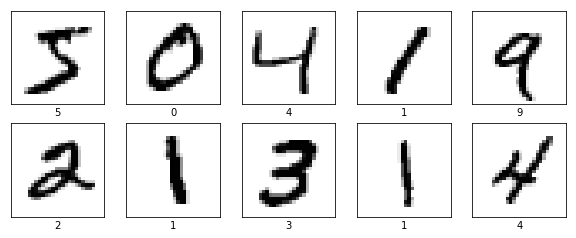

In [8]:
n= 10 # Number of digits to show
img_label_plt(train_images,train_labels,class_names,n)

### Building the model

In [9]:
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    # Compiling the model
    model.compile(optimizer=tf.keras.optimizers.Adam(), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

The input layer of the network contains neurons encoding the values of the input pixels. Our training data for the network will consist many 28x28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. For simplicity I've omitted most of the 784 input neurons in the diagram below. The input pixels are greyscale, with a value of 0.0 representing white, a value of 1.0 representing black, and in between values representing gradually darkening shades of grey.

![NN](images/NEURAL_N.png)


The second layer of the network is a hidden layer. We denote the number of neurons in this hidden layer by 128.
The example shown illustrates a small hidden layer, containing just n=15 neurons.

The output layer of the network contains 10 neurons. If the first neuron fires, i.e., has an output ≈1, then that will indicate that the network thinks the digit is a 0. If the second neuron fires then that will indicate that the network thinks the digit is a 1. And so on. A little more precisely, we number the output neurons from 0 through 9, and figure out which neuron has the highest activation value. If that neuron is, say, neuron number 6, then our network will guess that the input digit was a 6. And so on for the other output neurons.
    
To understand why we do this, it helps to think about what the neural network is doing from first principles. Consider first the case where we use 10 output neurons. Let's concentrate on the first output neuron, the one that's trying to decide whether or not the digit is a 0. It does this by weighing up evidence from the hidden layer of neurons. What are those hidden neurons doing? Well, just suppose for the sake of argument that the first neuron in the hidden layer detects whether or not an image like the following is present:



![NN](images/mnist_top_left_feature.png)


It can do this by heavily weighting input pixels which overlap with the image, and only lightly weighting the other inputs. In a similar way, let's suppose for the sake of argument that the second, third, and fourth neurons in the hidden layer detect whether or not the following images are present:

![NN](images/mnist_other_features.png)


As we may have guess, these four images together make up the 0 image that we saw in the line of digits shown earlier:

![NN](images/mnist_complete_zero.png)


So if all four of these hidden neurons are firing then we can conclude that the digit is a 0. 

### Training the model


*Uncomment commands below if you run your model for the first time and you want to save it*

In [11]:
# model = build_model()
# model.fit(train_images, train_labels, epochs=9, workers=5, use_multiprocessing=True)
# model.save('PROJEKT/model/digit_recognizer_model.h5')

Epoch 1/9
60000/60000 [==============================] - 13s 213us/step - loss: 0.2629 - acc: 0.9248
Epoch 2/9
60000/60000 [==============================] - 5s 88us/step - loss: 0.1187 - acc: 0.9650: 1s - loss: 0. - ETA: 0s - loss: 0.1197 - acc: 0.
Epoch 3/9
60000/60000 [==============================] - 5s 86us/step - loss: 0.0789 - acc: 0.9764
Epoch 4/9
60000/60000 [==============================] - 5s 85us/step - loss: 0.0599 - acc: 0.9819
Epoch 5/9
60000/60000 [==============================] - 5s 85us/step - loss: 0.0463 - acc: 0.9857
Epoch 6/9
60000/60000 [==============================] - 5s 87us/step - loss: 0.0366 - acc: 0.9887
Epoch 7/9
60000/60000 [==============================] - 5s 86us/step - loss: 0.0303 - acc: 0.9902
Epoch 8/9
60000/60000 [==============================] - 5s 86us/step - loss: 0.0235 - acc: 0.9928
Epoch 9/9
60000/60000 [==============================] - 5s 88us/step - loss: 0.0206 - acc: 0.9935: 0s - loss: 0.0204 - acc:


*Skip this part if you already trained your model or already saved one*

In [10]:
#    Load model from model directory including weights and optimizer.
model = keras.models.load_model('model/digit_recognizer_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Evaluate the model
Check how the model performs on the test dataset:

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 148us/step
Test accuracy: 0.9776


#### Function for visualizations

In [12]:
# Visualisation functions
def digit_plot(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

### Begin predictions
     A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different shapes of digits 0-9.

6

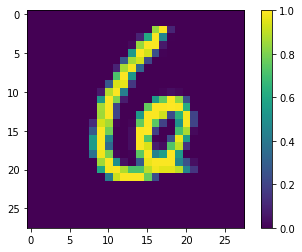

In [13]:
predictions = model.predict(test_images) # Our predictions for test_images

sample_pred=123  # n-th item from test_images
predictions[sample_pred] # Prediction array of test_images
np.argmax(predictions[sample_pred]) # Our predicted number

inspect_plt(test_images,sample_pred) # Visual check for labeled digit
test_labels[sample_pred] # Non-visual outpud of labeled digit


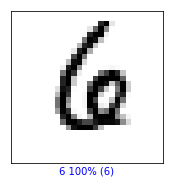

In [14]:
# Visualized proof of our prediction
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
digit_plot(sample_pred, predictions, test_labels, test_images)

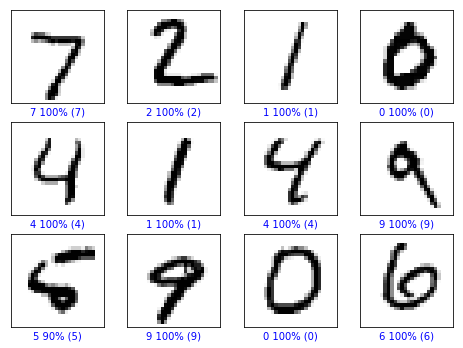

In [15]:
# Plot for the first n test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 6
num_cols = 2

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, i+1)
  digit_plot(i, predictions, test_labels, test_images)

### Custom predictions


Just open paint and create black square. 
Then draw with pencil or brush digit from 0-9 and save it.

In [16]:
# Required libraries
from scipy import misc
import matplotlib.image as mpimg
import PIL
from PIL import Image

In [17]:
# Converting from RGB to gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])




In [18]:
# Custom prediction function
def custom_pred(img, model):
    
    # Reshape input image to 28x28 array
    image = Image.open(img)
    hpercent = (28 / float(image.size[1]))
    wsize = int((float(image.size[0]) * float(hpercent)))
    drawing = image.resize((wsize, 28), PIL.Image.ANTIALIAS)
    
    # Convert image object into numpy array
    pix = np.array(drawing.getdata()).reshape(drawing.size[0],
                  drawing.size[1], 4)
    
    # Switch RGB scale into gray scale
    gray = rgb2gray(pix)    
    
    # Show drawed digit
    plt.imshow(gray, cmap = plt.get_cmap('gray'))
    plt.show()
    
    # Reshape array
    gray = gray.reshape(1,28,28).astype('float64')
    
    # Make prediction
    predictions = model.predict(gray)    
    cnt=0
    for i in range(10):
        if predictions[0][i] == 1:
            print("I predict that you draw: ",cnt)
        cnt+=1

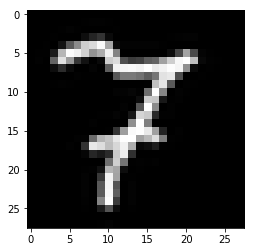

I predict that you draw:  7


In [19]:
custom_pred("number.jpg", model)